In [1]:
#!pip install fredapi
#此為製造商耐久財新訂單與消費者物價指數的分析程式碼

In [2]:
from fredapi import Fred

In [3]:
fred = Fred(api_key='a647122989b20aaac3b3e716703300be')

In [4]:
data1 = fred.get_series('DGORDER')

In [5]:
type(data1) #series代表時間序列

pandas.core.series.Series

In [6]:
data1 = fred.get_series('DGORDER', '1/1/2010')

<Axes: >

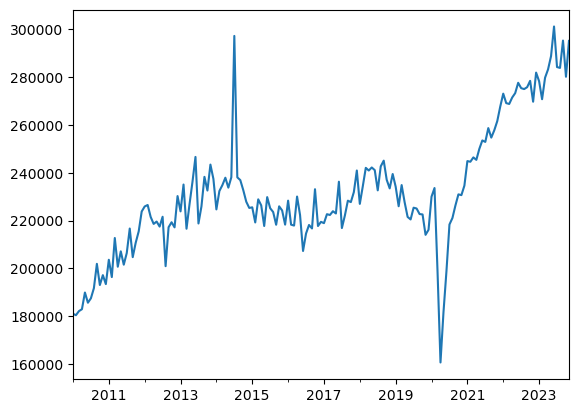

In [7]:
data1.plot()

In [8]:
data2 = fred.get_series('CPIAUCSL')

In [9]:
type(data2)

pandas.core.series.Series

In [10]:
data2 = fred.get_series('CPIAUCSL', '1/1/2010')

<Axes: >

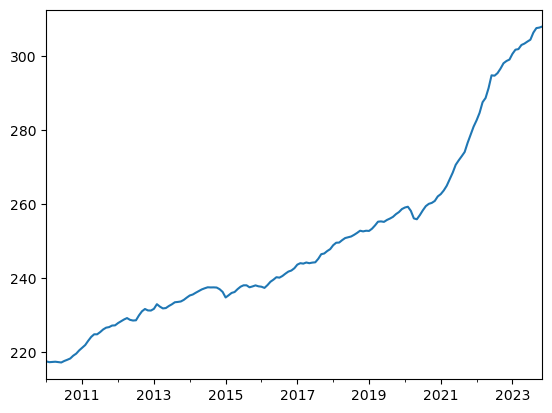

In [11]:
data2.plot()

In [12]:
df1 = data1.to_frame(name="DGORDER")
df2 = data2.to_frame(name='CPIAUCSL')

In [13]:
import pandas as pd
df_merged = pd.concat([df1, df2], axis=1)

In [14]:
df_merged

,DGORDER,CPIAUCSL
2010-01-01,181016.0,217.488
2010-02-01,180450.0,217.281
2010-03-01,182148.0,217.353
2010-04-01,182948.0,217.403
2010-05-01,189932.0,217.290
...,...,...
2023-07-01,284282.0,304.348
2023-08-01,283917.0,306.269
2023-09-01,295365.0,307.481
2023-10-01,280217.0,307.619


In [15]:
import matplotlib
import matplotlib.pyplot as plt

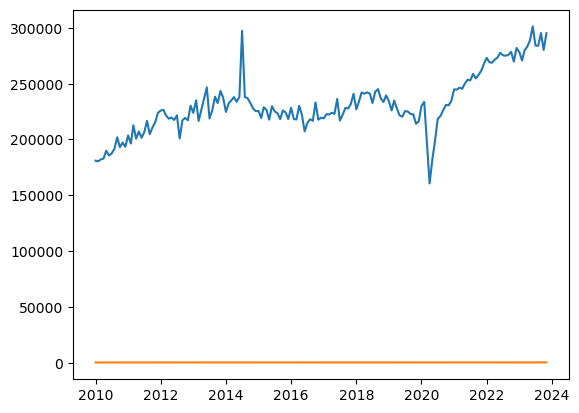

In [16]:
plt.plot(df_merged.index, df_merged['DGORDER'])
plt.plot(df_merged.index, df_merged['CPIAUCSL'])

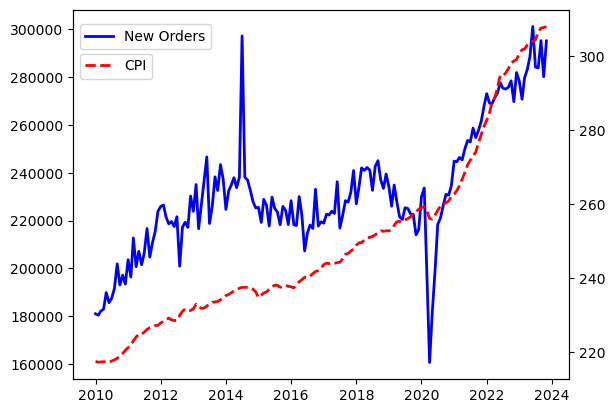

In [17]:
fig,ax = plt.subplots()
ax.plot(df_merged.index, df_merged['DGORDER'],color="blue", linewidth=2, label="New Orders")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.98))
ax2=ax.twinx()
ax2.plot(df_merged.index, df_merged['CPIAUCSL'],color="red", linewidth=2, linestyle='dashed', label="CPI")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
fig.savefig('折線圖.jpg',format='jpeg')

In [18]:
df_merged.corr()

,DGORDER,CPIAUCSL
DGORDER,1.000000,0.828382
CPIAUCSL,0.828382,1.000000


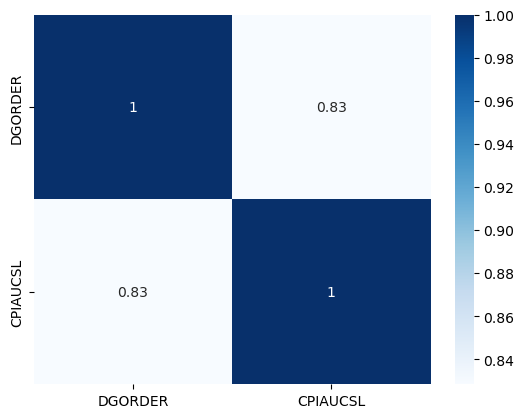

In [19]:
import seaborn as sns
svm = sns.heatmap(df_merged.corr(), cmap="Blues", annot=True)
figure = svm.get_figure()    
figure.savefig('相關係數.png', dpi=400)

<Axes: xlabel='DGORDER', ylabel='CPIAUCSL'>

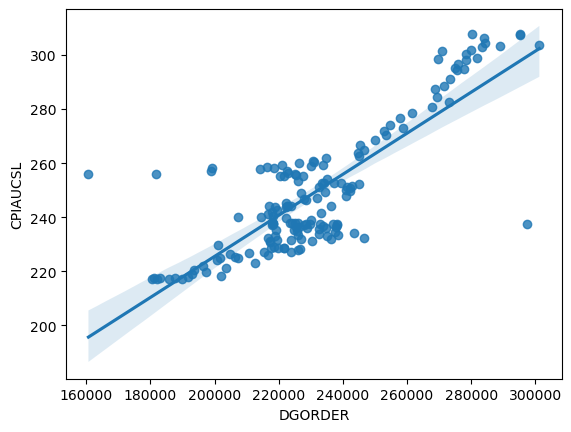

In [20]:
# use the function regplot to make a scatterplot
sns.regplot(x=df_merged['DGORDER'], y=df_merged['CPIAUCSL'])

In [21]:
df_diff1 = df_merged['DGORDER'].diff()

In [22]:
df_diff2 = df_merged['CPIAUCSL'].diff()

In [23]:
df_merged2 = pd.concat([df_diff1, df_diff2], axis=1)

In [24]:
df_merged2

,DGORDER,CPIAUCSL
2010-01-01,NaN,NaN
2010-02-01,-566.0,-0.207
2010-03-01,1698.0,0.072
2010-04-01,800.0,0.050
2010-05-01,6984.0,-0.113
...,...,...
2023-07-01,-16980.0,0.507
2023-08-01,-365.0,1.921
2023-09-01,11448.0,1.212
2023-10-01,-15148.0,0.138


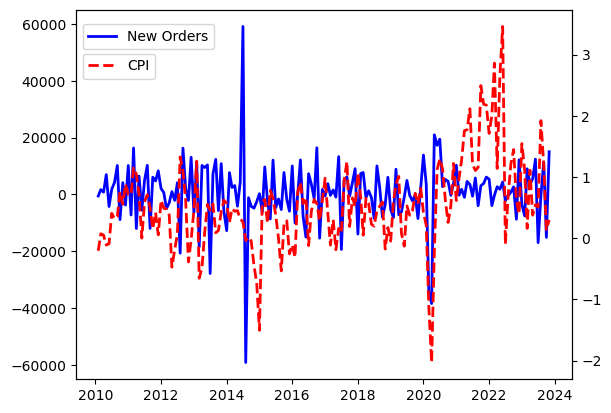

In [25]:
fig,ax = plt.subplots()
ax.plot(df_merged2.index, df_merged2['DGORDER'],color="blue", linewidth=2, label="New Orders")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.98))
ax2=ax.twinx()
ax2.plot(df_merged2.index, df_merged2['CPIAUCSL'],color="red", linewidth=2, linestyle='dashed', label="CPI")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
fig.savefig('折線圖.jpg',format='jpeg')

In [26]:
df_merged2.corr()

,DGORDER,CPIAUCSL
DGORDER,1.000000,0.197945
CPIAUCSL,0.197945,1.000000


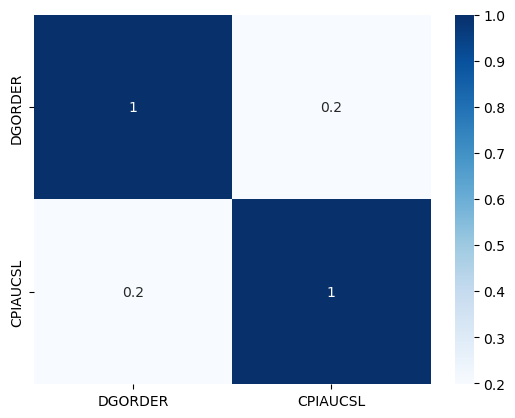

In [27]:
import seaborn as sns
svm2 = sns.heatmap(df_merged2.corr(), cmap="Blues", annot=True)
figure = svm2.get_figure()    
figure.savefig('相關係數.png', dpi=400)

In [28]:
df_pct1 = df_merged['DGORDER'].pct_change()

In [29]:
df_pct2 = df_merged['CPIAUCSL'].pct_change()

In [30]:
df_merged3 = pd.concat([df_pct1, df_pct2], axis=1)

In [31]:
df_merged3

,DGORDER,CPIAUCSL
2010-01-01,NaN,NaN
2010-02-01,-0.003127,-0.000952
2010-03-01,0.009410,0.000331
2010-04-01,0.004392,0.000230
2010-05-01,0.038175,-0.000520
...,...,...
2023-07-01,-0.056363,0.001669
2023-08-01,-0.001284,0.006312
2023-09-01,0.040322,0.003957
2023-10-01,-0.051286,0.000449


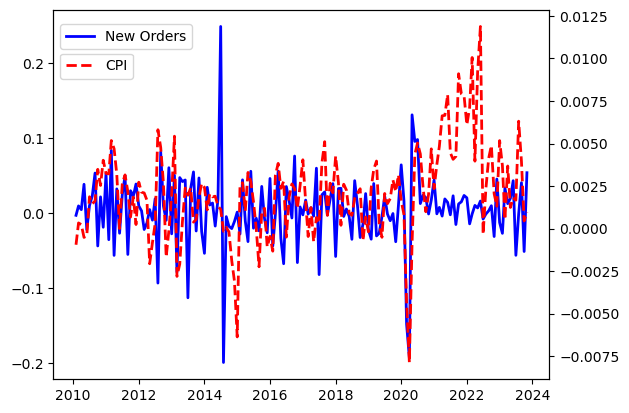

In [32]:
fig,ax = plt.subplots()
ax.plot(df_merged3.index, df_merged3['DGORDER'],color="blue", linewidth=2, label="New Orders")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.98))
ax2=ax.twinx()
ax2.plot(df_merged3.index, df_merged3['CPIAUCSL'],color="red", linewidth=2, linestyle='dashed', label="CPI")
plt.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
fig.savefig('折線圖.jpg',format='jpeg')

In [33]:
df_merged3.corr()

,DGORDER,CPIAUCSL
DGORDER,1.000000,0.206954
CPIAUCSL,0.206954,1.000000


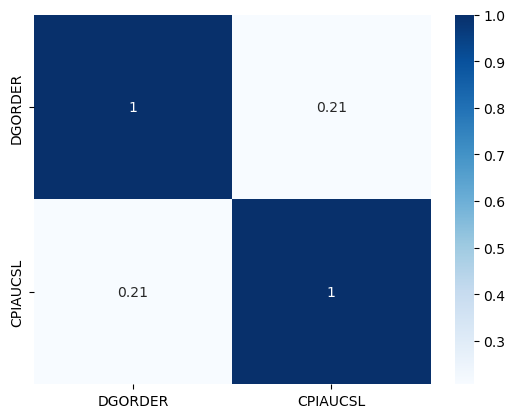

In [34]:
import seaborn as sns
svm3 = sns.heatmap(df_merged3.corr(), cmap="Blues", annot=True)
figure = svm3.get_figure()    
figure.savefig('相關係數.png', dpi=400)